**2. Implementing Feedforward neural networks with Keras and TensorFlow**

a. Import the necessary packages

b. Load the training and testing data (MNIST/CIFAR10)

c. Define the network architecture using Keras

d. Train the model using SGD

e. Evaluate the network

f. Plot the training loss and accuracy

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [ ]:
#Load the training and testing data (MNIST/CIFAR10)
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


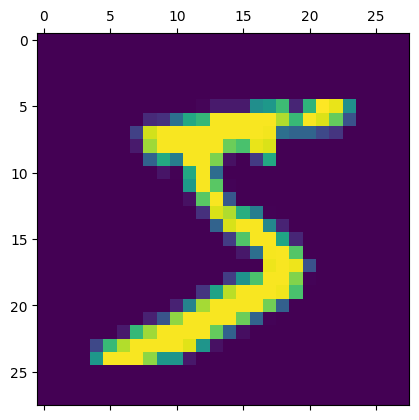

In [ ]:
#Define the network architecture
plt.matshow(x_train[0])

In [ ]:
x_train=x_train/255
x_test=x_test/255


In [ ]:
x_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [ ]:
#Train the model using SGD
model=keras.Sequential([
 keras.layers.Flatten(input_shape=(28,28)),
 keras.layers.Dense(128,activation='relu'),
 keras.layers.Dense(10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

In [ ]:
# Evaluate the network
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3005 - accuracy: 0.1124 - val_loss: 2.4317 - val_accuracy: 0.1283
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2999 - accuracy: 0.1124 - val_loss: 2.3661 - val_accuracy: 0.1470
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2996 - accuracy: 0.1124 - val_loss: 2.3031 - val_accuracy: 0.1692
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.2992 - accuracy: 0.1124 - val_loss: 2.2410 - val_accuracy: 0.2003
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.2988 - accuracy: 0.1124 - val_loss: 2.1814 - val_accuracy: 0.2391
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2984 - accuracy: 0.1124 - val_loss: 2.1250 - val_accuracy: 0.2703
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2980 - accuracy: 0.1124 - val_loss: 2.0692 - val_accurac

In [ ]:
# Plot the training loss and accuracy
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.9124 - accuracy: 0.4091
Loss=1.912
Accuracy=0.409


<function matplotlib.pyplot.show(close=None, block=None)>

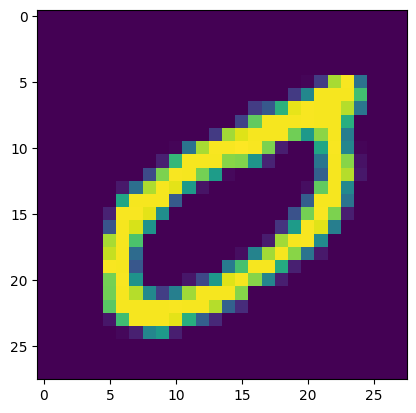

In [ ]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

In [ ]:
test_predict=model.predict(x_test)
test_predict_labels=np.argmax(test_predict,axis=1)
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=test_predict_labels)
print('confusion matrix of the test set :\n', confusion_matrix)

313/313 [==============================] - 1s 2ms/step
confusion matrix of the test set :
 tf.Tensor(
[[ 435   27    0    0   21    2   20    1  474    0]
 [   0 1051    0    0    0    1    4    0   79    0]
 [  37  172   26    0   42    0   97    7  650    1]
 [   7  254    1   14   14    6   20    4  677   13]
 [  27   42    0    7  532   18   36    6  300   14]
 [  36  198    1    4   56   58   72    3  412   52]
 [  43   60    0    2   58   14  624    0  155    2]
 [  39  153    0   10   39    6    2  587  144   48]
 [  18  138    3    0   14   35   33    0  728    5]
 [  61  125    0   12  378   58    9   62  268   36]], shape=(10, 10), dtype=int32)
